# Lithuanian Macroeconomic Time Series Pipeline

This notebook executes the full macro indicator pipeline for Lithuania:
- deterministic endpoint resolution (World Bank + Eurostat + IMF)
- normalized long-format indicator data
- raw and indexed overlay charts for each indicator
- acceptance and gap diagnostics


In [2]:
import sys
from pathlib import Path

country_code = globals().get('country_code', 'LT')

if Path('macro_indicator_pipeline.py').exists():
    module_path = Path('.')
else:
    module_path = Path('bs2026_student_projects/Arturas_Sotnicenko')
if str(module_path.resolve()) not in sys.path:
    sys.path.append(str(module_path.resolve()))

from macro_indicator_pipeline import run, stream_resolved_sources

results = run(country_code=country_code, outdir='outputs')
coverage = results['coverage']
missing_queue = results['missing_queue']

print('Indicator coverage (top rows where resolved_url is not null):')
display(coverage[coverage['resolved_url'].notna()].head(20))

print('\nCoverage status counts:')
display(coverage['status'].value_counts().rename_axis('status').reset_index(name='count'))

print('\nCoverage by source and status:')
source_status = coverage.groupby(['source_name', 'status']).size().unstack(fill_value=0).reset_index()
display(source_status)

print('\nMissing lookup queue (top rows):')
display(missing_queue.head(20))

stream = stream_resolved_sources(country_code=country_code, coverage=coverage)
endpoint_status = stream['endpoint_status_df']
print('\nResolved endpoint checks:')
display(endpoint_status)

Indicator coverage (top rows where resolved_url is not null):


,indicator_id,indicator_name,specificity,priority,source_id,source_name,status,series_label,dataset_code,indicator_code,series_key,confidence,mapping_quality,specificity_note,resolved_url,capability_note,search_query
1,gdp_current_usd,GDP,"Current US dollars, annual",core,eurostat,Eurostat,resolved,GDP current prices (million EUR),nama_10_gdp,NaN,geo={cc}&freq=A&na_item=B1G&unit=CP_MEUR,high,proxy,Unit differs from US dollars.,https://ec.europa.eu/eurostat/api/disseminatio...,Expected in source catalog; exact dataset/key ...,"Eurostat GDP Current US dollars, annual Lithua..."
3,gdp_current_usd,GDP,"Current US dollars, annual",core,imf,IMF,resolved,"GDP, current prices",DATAMAPPER,NGDPD,NaN,high,proxy,Comparable but source-specific methodology.,https://www.imf.org/external/datamapper/api/v1...,Expected in source catalog; exact dataset/key ...,"IMF GDP Current US dollars, annual Lithuania d..."
0,gdp_current_usd,GDP,"Current US dollars, annual",core,world_bank,World Bank,resolved,GDP (current US$),WDI,NY.GDP.MKTP.CD,NaN,high,exact,Matches target definition.,https://api.worldbank.org/v2/country/LT/indica...,Expected in source catalog; exact dataset/key ...,"World Bank GDP Current US dollars, annual Lith..."
11,inflation_cpi_yoy,Inflation,"Consumer prices, annual % change",core,eurostat,Eurostat,resolved,HICP annual rate of change,prc_hicp_manr,NaN,geo={cc}&freq=M&coicop=CP00&unit=RCH_A,high,proxy,Monthly YoY series aggregated to annual mean.,https://ec.europa.eu/eurostat/api/disseminatio...,Expected in source catalog; exact dataset/key ...,"Eurostat Inflation Consumer prices, annual % c..."
13,inflation_cpi_yoy,Inflation,"Consumer prices, annual % change",core,imf,IMF,resolved,"Inflation rate, average consumer prices",DATAMAPPER,PCPIPCH,NaN,high,proxy,"Comparable CPI definition, source-specific met...",https://www.imf.org/external/datamapper/api/v1...,Expected in source catalog; exact dataset/key ...,"IMF Inflation Consumer prices, annual % change..."
10,inflation_cpi_yoy,Inflation,"Consumer prices, annual % change",core,world_bank,World Bank,resolved,"Inflation, consumer prices (annual %)",WDI,FP.CPI.TOTL.ZG,NaN,high,exact,Matches target definition.,https://api.worldbank.org/v2/country/LT/indica...,Expected in source catalog; exact dataset/key ...,"World Bank Inflation Consumer prices, annual %..."
31,lending_interest_rate,Interest rate,"Lending interest rate, annual %",core,eurostat,Eurostat,resolved,Long-term interest rate (EMU convergence),irt_lt_mcby_a,NaN,geo={cc}&freq=A&int_rt=MCBY,medium,proxy,Proxy for lending interest rate.,https://ec.europa.eu/eurostat/api/disseminatio...,Expected in source catalog; exact dataset/key ...,"Eurostat Interest rate Lending interest rate, ..."
33,lending_interest_rate,Interest rate,"Lending interest rate, annual %",core,imf,IMF,resolved,Money market openness index,DATAMAPPER,Ka_mm,NaN,low,proxy,No direct IMF lending-rate series in DataMappe...,https://www.imf.org/external/datamapper/api/v1...,Expected in source catalog; exact dataset/key ...,"IMF Interest rate Lending interest rate, annua..."
30,lending_interest_rate,Interest rate,"Lending interest rate, annual %",core,world_bank,World Bank,resolved,Lending interest rate (%),WDI,FR.INR.LEND,NaN,high,exact,Matches target definition.,https://api.worldbank.org/v2/country/LT/indica...,Expected in source catalog; exact dataset/key ...,World Bank Interest rate Lending interest rate...
21,trade_balance_pct_gdp,Trade balance,"External balance in goods and services, % of G...",core,eurostat,Eurostat,resolved,Goods and services balance (% GDP),bop_gdp6_q,NaN,geo={cc}&freq=A&unit=PC_GDP&s_adj=NSA&bop_item...,medium,proxy,BPM6 specification may differ from World Bank ...,https://ec.europa.eu/eurostat/api/disseminatio...,Expected in source catalog; exact dataset/key ...,Eurostat Trade balance External balance in goo...



Coverage status counts:


,status,count
0,missing_source,24
1,known_but_missing_params,19
2,resolved,17



Coverage by source and status:


status,source_name,known_but_missing_params,missing_source,resolved
0,BIS,0,6,0
1,Bank of Lithuania,2,4,0
2,ECB,2,4,0
3,Eurostat,0,0,6
4,ILO,1,5,0
5,IMF,1,0,5
6,OECD,6,0,0
7,Statistics Lithuania,6,0,0
8,UN Comtrade,1,5,0
9,World Bank,0,0,6



Missing lookup queue (top rows):


,indicator_id,indicator_name,source_id,source_name,status,capability_note,search_query,lookup_stage,next_action,web_fallback
56,exchange_rate_lcu_per_usd,Exchange rate,bank_of_lithuania,Bank of Lithuania,known_but_missing_params,Expected in central-bank statistics portal.,Bank of Lithuania Exchange rate Official excha...,catalog_only,Find dataset code/key in official API catalog ...,Not used in automated pipeline
57,exchange_rate_lcu_per_usd,Exchange rate,bis,BIS,missing_source,NaN,BIS Exchange rate Official exchange rate (LCU ...,catalog_only,Find dataset code/key in official API catalog ...,Not used in automated pipeline
52,exchange_rate_lcu_per_usd,Exchange rate,ecb,ECB,known_but_missing_params,Expected via SDW dataflow/key selection.,ECB Exchange rate Official exchange rate (LCU ...,catalog_only,Find dataset code/key in official API catalog ...,Not used in automated pipeline
59,exchange_rate_lcu_per_usd,Exchange rate,ilo,ILO,missing_source,NaN,ILO Exchange rate Official exchange rate (LCU ...,catalog_only,Find dataset code/key in official API catalog ...,Not used in automated pipeline
53,exchange_rate_lcu_per_usd,Exchange rate,imf,IMF,known_but_missing_params,Expected in source catalog; exact dataset/key ...,IMF Exchange rate Official exchange rate (LCU ...,catalog_only,Find dataset code/key in official API catalog ...,Not used in automated pipeline
54,exchange_rate_lcu_per_usd,Exchange rate,oecd,OECD,known_but_missing_params,Expected in source catalog; exact dataset/key ...,OECD Exchange rate Official exchange rate (LCU...,catalog_only,Find dataset code/key in official API catalog ...,Not used in automated pipeline
55,exchange_rate_lcu_per_usd,Exchange rate,statistics_lithuania,Statistics Lithuania,known_but_missing_params,Expected in source catalog; exact dataset/key ...,Statistics Lithuania Exchange rate Official ex...,catalog_only,Find dataset code/key in official API catalog ...,Not used in automated pipeline
58,exchange_rate_lcu_per_usd,Exchange rate,un_comtrade,UN Comtrade,missing_source,NaN,UN Comtrade Exchange rate Official exchange ra...,catalog_only,Find dataset code/key in official API catalog ...,Not used in automated pipeline
6,gdp_current_usd,GDP,bank_of_lithuania,Bank of Lithuania,missing_source,NaN,"Bank of Lithuania GDP Current US dollars, annu...",catalog_only,Find dataset code/key in official API catalog ...,Not used in automated pipeline
7,gdp_current_usd,GDP,bis,BIS,missing_source,NaN,"BIS GDP Current US dollars, annual Lithuania d...",catalog_only,Find dataset code/key in official API catalog ...,Not used in automated pipeline



Resolved endpoint checks:


,source_id,source_name,indicator_id,indicator_name,url,adapter,reachable,parsed,resolved_url,http_status,content_type,sample_headers,error
0,eurostat,Eurostat,gdp_current_usd,GDP,https://ec.europa.eu/eurostat/api/disseminatio...,json,True,True,https://ec.europa.eu/eurostat/api/disseminatio...,200,application/json,"[version, class, label, source, updated, value...",None
1,imf,IMF,gdp_current_usd,GDP,https://www.imf.org/external/datamapper/api/v1...,json,True,True,https://www.imf.org/external/datamapper/api/v1...,200,application/json,"[values, api]",None
2,world_bank,World Bank,gdp_current_usd,GDP,https://api.worldbank.org/v2/country/LT/indica...,world_bank,True,True,https://api.worldbank.org/v2/country/LT/indica...,200,application/json;charset=utf-8,"[[{""page"":1, pages:2, per_page:50, total:65, s...",None
3,eurostat,Eurostat,inflation_cpi_yoy,Inflation,https://ec.europa.eu/eurostat/api/disseminatio...,json,True,True,https://ec.europa.eu/eurostat/api/disseminatio...,200,application/json,"[version, class, label, source, updated, value...",None
4,imf,IMF,inflation_cpi_yoy,Inflation,https://www.imf.org/external/datamapper/api/v1...,json,True,True,https://www.imf.org/external/datamapper/api/v1...,200,application/json,"[values, api]",None
5,world_bank,World Bank,inflation_cpi_yoy,Inflation,https://api.worldbank.org/v2/country/LT/indica...,world_bank,True,True,https://api.worldbank.org/v2/country/LT/indica...,200,application/json;charset=utf-8,"[[{""page"":1, pages:2, per_page:50, total:65, s...",None
6,eurostat,Eurostat,lending_interest_rate,Interest rate,https://ec.europa.eu/eurostat/api/disseminatio...,json,True,True,https://ec.europa.eu/eurostat/api/disseminatio...,200,application/json,"[version, class, label, source, updated, value...",None
7,imf,IMF,lending_interest_rate,Interest rate,https://www.imf.org/external/datamapper/api/v1...,json,True,True,https://www.imf.org/external/datamapper/api/v1...,200,application/json,"[values, api]",None
8,world_bank,World Bank,lending_interest_rate,Interest rate,https://api.worldbank.org/v2/country/LT/indica...,world_bank,True,True,https://api.worldbank.org/v2/country/LT/indica...,200,application/json;charset=utf-8,"[[{""page"":1, pages:2, per_page:50, total:65, s...",None
9,eurostat,Eurostat,trade_balance_pct_gdp,Trade balance,https://ec.europa.eu/eurostat/api/disseminatio...,json,True,True,https://ec.europa.eu/eurostat/api/disseminatio...,200,application/json,"[version, class, label, source, updated, value...",None


In [3]:
import sys
from pathlib import Path

from IPython.display import Image, Markdown, display

country_code = globals().get('country_code', 'LT')

current_dir = Path.cwd()
root = next(
    (p for p in [current_dir, *current_dir.parents] if (p / "macro_indicator_pipeline.py").exists()),
    None,
 )
if root is None:
    raise FileNotFoundError("macro_indicator_pipeline.py not found in current or parent directories.")

module_path = root
outdir = root / "bs2026_student_projects" / "Arturas_Sotnicenko" / "outputs"

if str(module_path.resolve()) not in sys.path:
    sys.path.append(str(module_path.resolve()))

from macro_indicator_pipeline import run

results = run(country_code=country_code, outdir=str(outdir), include_analysis=True)

indicator_index = results['indicator_index']
coverage = results['coverage']
missing_queue = results['missing_queue']
series_registry = results['series_registry']
resolved_registry = results['resolved_registry']
normalized_df = results['normalized_df']
fetch_status = results['fetch_status']
chart_manifest = results['chart_manifest']
coverage_gaps = results['coverage_gaps']
acceptance_checks = results['acceptance_checks']

print(f'Country code: {country_code}')
print(f'Output directory: {outdir.resolve()}')

Country code: LT
Output directory: /workspaces/da-ai/bs2026_student_projects/Arturas_Sotnicenko/bs2026_student_projects/Arturas_Sotnicenko/outputs


In [3]:
print('Coverage status counts:')
display(coverage['status'].value_counts().rename_axis('status').reset_index(name='count'))

print('Resolved endpoints in coverage:')
display(
    coverage[coverage['status'] == 'resolved'][
        ['indicator_id', 'source_id', 'series_label', 'mapping_quality', 'resolved_url']
    ].sort_values(['indicator_id', 'source_id'])
)

print('Resolved registry diagnostics:')
display(
    resolved_registry[
        [
            'indicator_id',
            'source_id',
            'endpoint_status',
            'resolution_reason',
            'http_status',
            'resolved_url',
        ]
    ].sort_values(['indicator_id', 'source_id'])
)


Coverage status counts:


,status,count
0,missing_source,24
1,known_but_missing_params,19
2,resolved,17


Resolved endpoints in coverage:


,indicator_id,source_id,series_label,mapping_quality,resolved_url
51,exchange_rate_lcu_per_usd,eurostat,EUR to USD exchange rate (annual avg),proxy,https://ec.europa.eu/eurostat/api/disseminatio...
50,exchange_rate_lcu_per_usd,world_bank,"Official exchange rate (LCU per US$, period av...",exact,https://api.worldbank.org/v2/country/LT/indica...
1,gdp_current_usd,eurostat,GDP current prices (million EUR),proxy,https://ec.europa.eu/eurostat/api/disseminatio...
3,gdp_current_usd,imf,"GDP, current prices",proxy,https://www.imf.org/external/datamapper/api/v1...
0,gdp_current_usd,world_bank,GDP (current US$),exact,https://api.worldbank.org/v2/country/LT/indica...
11,inflation_cpi_yoy,eurostat,HICP annual rate of change,proxy,https://ec.europa.eu/eurostat/api/disseminatio...
13,inflation_cpi_yoy,imf,"Inflation rate, average consumer prices",proxy,https://www.imf.org/external/datamapper/api/v1...
10,inflation_cpi_yoy,world_bank,"Inflation, consumer prices (annual %)",exact,https://api.worldbank.org/v2/country/LT/indica...
31,lending_interest_rate,eurostat,Long-term interest rate (EMU convergence),proxy,https://ec.europa.eu/eurostat/api/disseminatio...
33,lending_interest_rate,imf,Money market openness index,proxy,https://www.imf.org/external/datamapper/api/v1...


Resolved registry diagnostics:


,indicator_id,source_id,endpoint_status,resolution_reason,http_status,resolved_url
0,exchange_rate_lcu_per_usd,eurostat,resolved,ok,200,https://ec.europa.eu/eurostat/api/disseminatio...
1,exchange_rate_lcu_per_usd,world_bank,resolved,ok,200,https://api.worldbank.org/v2/country/LT/indica...
2,gdp_current_usd,eurostat,resolved,ok,200,https://ec.europa.eu/eurostat/api/disseminatio...
3,gdp_current_usd,imf,resolved,ok,200,https://www.imf.org/external/datamapper/api/v1...
4,gdp_current_usd,world_bank,resolved,ok,200,https://api.worldbank.org/v2/country/LT/indica...
5,inflation_cpi_yoy,eurostat,resolved,ok,200,https://ec.europa.eu/eurostat/api/disseminatio...
6,inflation_cpi_yoy,imf,resolved,ok,200,https://www.imf.org/external/datamapper/api/v1...
7,inflation_cpi_yoy,world_bank,resolved,ok,200,https://api.worldbank.org/v2/country/LT/indica...
8,lending_interest_rate,eurostat,resolved,ok,200,https://ec.europa.eu/eurostat/api/disseminatio...
9,lending_interest_rate,imf,resolved,ok,200,https://www.imf.org/external/datamapper/api/v1...


In [4]:
print('Mapping quality summary:')
display(
    series_registry.groupby(['indicator_id', 'mapping_quality'])
    .size()
    .rename('count')
    .reset_index()
    .sort_values(['indicator_id', 'mapping_quality'])
)

print('Fetch status:')
display(fetch_status.sort_values(['indicator_id', 'source_id']))

print('Coverage gaps and proxy caveats:')
display(coverage_gaps.sort_values(['indicator_id', 'source_id', 'gap_type']))


Mapping quality summary:


,indicator_id,mapping_quality,count
0,exchange_rate_lcu_per_usd,exact,1
1,exchange_rate_lcu_per_usd,proxy,1
2,gdp_current_usd,exact,1
3,gdp_current_usd,proxy,2
4,inflation_cpi_yoy,exact,1
5,inflation_cpi_yoy,proxy,2
6,lending_interest_rate,exact,1
7,lending_interest_rate,proxy,2
8,trade_balance_pct_gdp,exact,1
9,trade_balance_pct_gdp,proxy,2


Fetch status:


,indicator_id,source_id,source_name,endpoint_status,fetch_status,fetch_rows,fetch_error
0,exchange_rate_lcu_per_usd,eurostat,Eurostat,resolved,ok,55,None
1,exchange_rate_lcu_per_usd,world_bank,World Bank,resolved,ok,33,None
2,gdp_current_usd,eurostat,Eurostat,resolved,ok,30,None
3,gdp_current_usd,imf,IMF,resolved,ok,36,None
4,gdp_current_usd,world_bank,World Bank,resolved,ok,30,None
5,inflation_cpi_yoy,eurostat,Eurostat,resolved,ok,29,None
6,inflation_cpi_yoy,imf,IMF,resolved,ok,35,None
7,inflation_cpi_yoy,world_bank,World Bank,resolved,ok,33,None
8,lending_interest_rate,eurostat,Eurostat,resolved,ok,25,None
9,lending_interest_rate,imf,IMF,resolved,ok,14,None


Coverage gaps and proxy caveats:


,indicator_id,indicator_name,source_id,source_name,gap_type,gap_note,mapping_quality,specificity_note,endpoint_status,resolution_reason,resolution_error,plot_ready_rows,series_label,resolved_url
16,exchange_rate_lcu_per_usd,Exchange rate,eurostat,Eurostat,proxy_mapping,Proxy because Lithuania uses EUR in current pe...,proxy,Proxy because Lithuania uses EUR in current pe...,resolved,ok,None,55,EUR to USD exchange rate (annual avg),https://ec.europa.eu/eurostat/api/disseminatio...
17,exchange_rate_lcu_per_usd,Exchange rate,imf,IMF,no_mapping_defined,No mapping row defined for source/indicator pair.,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
1,gdp_current_usd,GDP,eurostat,Eurostat,proxy_mapping,Unit differs from US dollars.,proxy,Unit differs from US dollars.,resolved,ok,None,30,GDP current prices (million EUR),https://ec.europa.eu/eurostat/api/disseminatio...
2,gdp_current_usd,GDP,imf,IMF,proxy_mapping,Comparable but source-specific methodology.,proxy,Comparable but source-specific methodology.,resolved,ok,None,36,"GDP, current prices",https://www.imf.org/external/datamapper/api/v1...
4,inflation_cpi_yoy,Inflation,eurostat,Eurostat,proxy_mapping,Monthly YoY series aggregated to annual mean.,proxy,Monthly YoY series aggregated to annual mean.,resolved,ok,None,29,HICP annual rate of change,https://ec.europa.eu/eurostat/api/disseminatio...
5,inflation_cpi_yoy,Inflation,imf,IMF,proxy_mapping,"Comparable CPI definition, source-specific met...",proxy,"Comparable CPI definition, source-specific met...",resolved,ok,None,35,"Inflation rate, average consumer prices",https://www.imf.org/external/datamapper/api/v1...
10,lending_interest_rate,Interest rate,eurostat,Eurostat,proxy_mapping,Proxy for lending interest rate.,proxy,Proxy for lending interest rate.,resolved,ok,None,25,Long-term interest rate (EMU convergence),https://ec.europa.eu/eurostat/api/disseminatio...
11,lending_interest_rate,Interest rate,imf,IMF,proxy_mapping,No direct IMF lending-rate series in DataMappe...,proxy,No direct IMF lending-rate series in DataMappe...,resolved,ok,None,14,Money market openness index,https://www.imf.org/external/datamapper/api/v1...
9,lending_interest_rate,Interest rate,world_bank,World Bank,no_plot_ready_data,Resolved endpoint returned no normalized data ...,exact,Matches target definition.,resolved,ok,None,0,Lending interest rate (%),https://api.worldbank.org/v2/country/LT/indica...
7,trade_balance_pct_gdp,Trade balance,eurostat,Eurostat,proxy_mapping,BPM6 specification may differ from World Bank ...,proxy,BPM6 specification may differ from World Bank ...,resolved,ok,None,30,Goods and services balance (% GDP),https://ec.europa.eu/eurostat/api/disseminatio...


In [5]:
print('Normalized indicator dataset (head):')
display(normalized_df.head(20))

print('Plot-ready source count by indicator:')
display(
    normalized_df.groupby('indicator_id')['source_id']
    .nunique()
    .rename('plot_ready_sources')
    .reset_index()
    .sort_values('indicator_id')
)

print('Acceptance checks:')
display(acceptance_checks)


Normalized indicator dataset (head):


,indicator_id,source_id,source_name,country_code,country_code_iso3,period,year,value,unit_raw,frequency_raw,frequency_canonical,mapping_quality,specificity_note,resolved_url,series_key
0,exchange_rate_lcu_per_usd,eurostat,Eurostat,LT,LTU,1971,1971,1.0478,NAC,A,A,proxy,Proxy because Lithuania uses EUR in current pe...,https://ec.europa.eu/eurostat/api/disseminatio...,freq=A&statinfo=AVG&unit=NAC&currency=USD
1,exchange_rate_lcu_per_usd,eurostat,Eurostat,LT,LTU,1972,1972,1.1218,NAC,A,A,proxy,Proxy because Lithuania uses EUR in current pe...,https://ec.europa.eu/eurostat/api/disseminatio...,freq=A&statinfo=AVG&unit=NAC&currency=USD
2,exchange_rate_lcu_per_usd,eurostat,Eurostat,LT,LTU,1973,1973,1.2317,NAC,A,A,proxy,Proxy because Lithuania uses EUR in current pe...,https://ec.europa.eu/eurostat/api/disseminatio...,freq=A&statinfo=AVG&unit=NAC&currency=USD
3,exchange_rate_lcu_per_usd,eurostat,Eurostat,LT,LTU,1974,1974,1.1927,NAC,A,A,proxy,Proxy because Lithuania uses EUR in current pe...,https://ec.europa.eu/eurostat/api/disseminatio...,freq=A&statinfo=AVG&unit=NAC&currency=USD
4,exchange_rate_lcu_per_usd,eurostat,Eurostat,LT,LTU,1975,1975,1.2408,NAC,A,A,proxy,Proxy because Lithuania uses EUR in current pe...,https://ec.europa.eu/eurostat/api/disseminatio...,freq=A&statinfo=AVG&unit=NAC&currency=USD
5,exchange_rate_lcu_per_usd,eurostat,Eurostat,LT,LTU,1976,1976,1.118,NAC,A,A,proxy,Proxy because Lithuania uses EUR in current pe...,https://ec.europa.eu/eurostat/api/disseminatio...,freq=A&statinfo=AVG&unit=NAC&currency=USD
6,exchange_rate_lcu_per_usd,eurostat,Eurostat,LT,LTU,1977,1977,1.1411,NAC,A,A,proxy,Proxy because Lithuania uses EUR in current pe...,https://ec.europa.eu/eurostat/api/disseminatio...,freq=A&statinfo=AVG&unit=NAC&currency=USD
7,exchange_rate_lcu_per_usd,eurostat,Eurostat,LT,LTU,1978,1978,1.2741,NAC,A,A,proxy,Proxy because Lithuania uses EUR in current pe...,https://ec.europa.eu/eurostat/api/disseminatio...,freq=A&statinfo=AVG&unit=NAC&currency=USD
8,exchange_rate_lcu_per_usd,eurostat,Eurostat,LT,LTU,1979,1979,1.3705,NAC,A,A,proxy,Proxy because Lithuania uses EUR in current pe...,https://ec.europa.eu/eurostat/api/disseminatio...,freq=A&statinfo=AVG&unit=NAC&currency=USD
9,exchange_rate_lcu_per_usd,eurostat,Eurostat,LT,LTU,1980,1980,1.3923,NAC,A,A,proxy,Proxy because Lithuania uses EUR in current pe...,https://ec.europa.eu/eurostat/api/disseminatio...,freq=A&statinfo=AVG&unit=NAC&currency=USD


Plot-ready source count by indicator:


,indicator_id,plot_ready_sources
0,exchange_rate_lcu_per_usd,2
1,gdp_current_usd,3
2,inflation_cpi_yoy,3
3,lending_interest_rate,2
4,trade_balance_pct_gdp,2
5,unemployment_rate,3


Acceptance checks:


,check_name,actual_value,target,status,details
0,resolved_endpoints_at_least_16,17,>=16,pass,Resolved endpoints in core registry.
1,all_indicators_have_two_or_more_sources,6,6,pass,Count of indicators meeting >=2 plot-ready sou...
2,indicator_gdp_current_usd_sources,3,>=2,pass,Per-indicator plot-ready source count.
3,indicator_inflation_cpi_yoy_sources,3,>=2,pass,Per-indicator plot-ready source count.
4,indicator_trade_balance_pct_gdp_sources,2,>=2,pass,Per-indicator plot-ready source count.
5,indicator_lending_interest_rate_sources,2,>=2,pass,Per-indicator plot-ready source count.
6,indicator_unemployment_rate_sources,3,>=2,pass,Per-indicator plot-ready source count.
7,indicator_exchange_rate_lcu_per_usd_sources,2,>=2,pass,Per-indicator plot-ready source count.


## gdp_current_usd

,chart_type,status,base_year,file_path,note
3,overlay_index,ok,1995.0,/workspaces/da-ai/bs2026_student_projects/Artu...,
2,raw,ok,NaN,/workspaces/da-ai/bs2026_student_projects/Artu...,


**overlay_index**

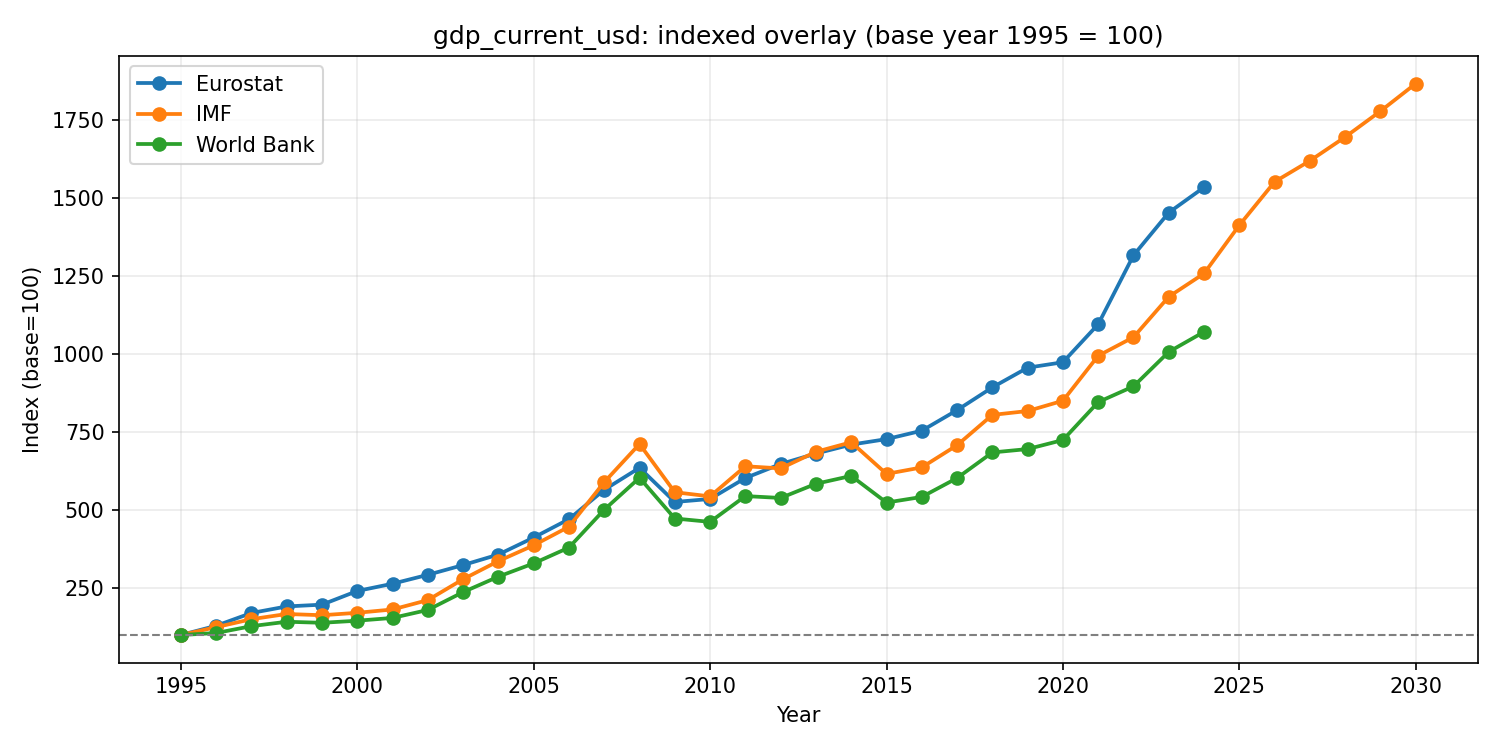

**raw**

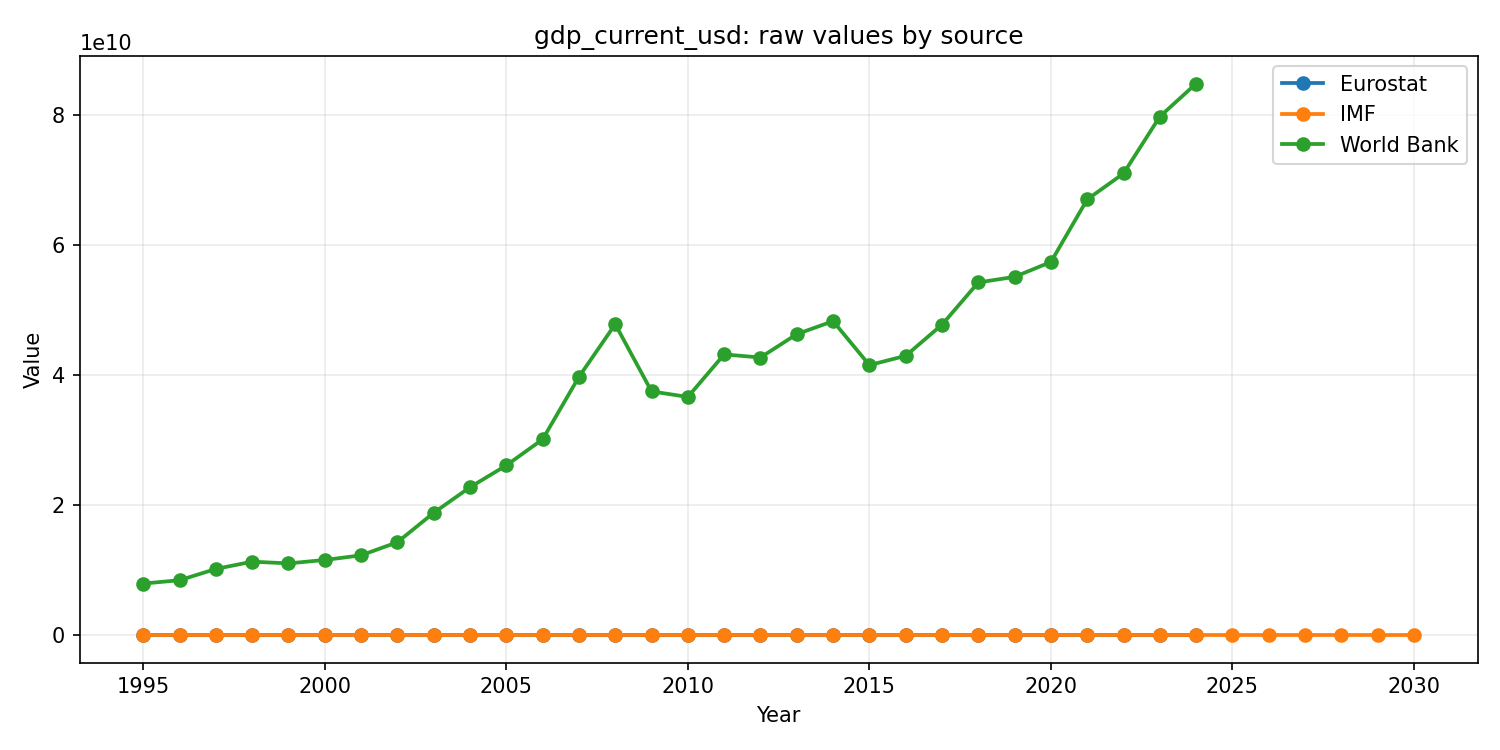

## inflation_cpi_yoy

,chart_type,status,base_year,file_path,note
5,overlay_index,ok,1996.0,/workspaces/da-ai/bs2026_student_projects/Artu...,
4,raw,ok,NaN,/workspaces/da-ai/bs2026_student_projects/Artu...,


**overlay_index**

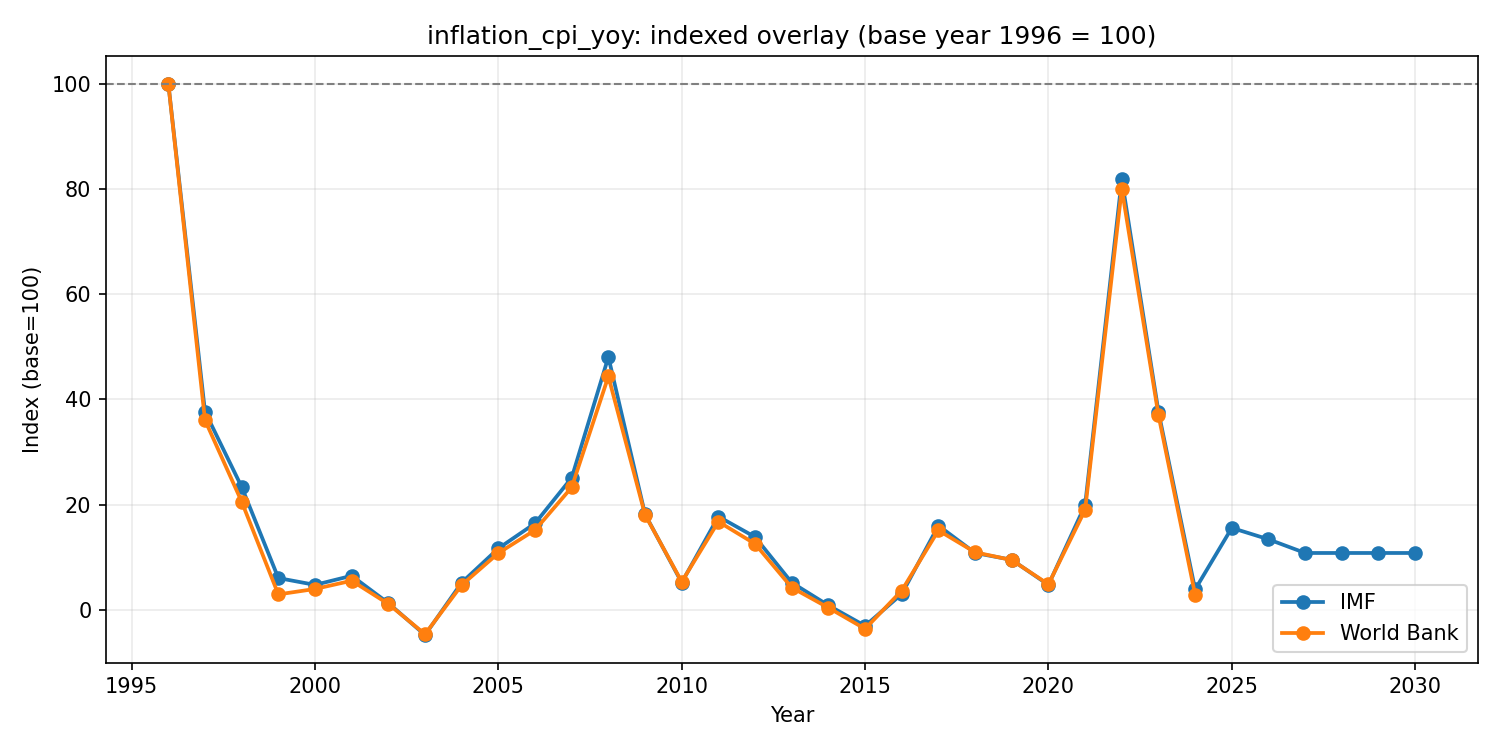

**raw**

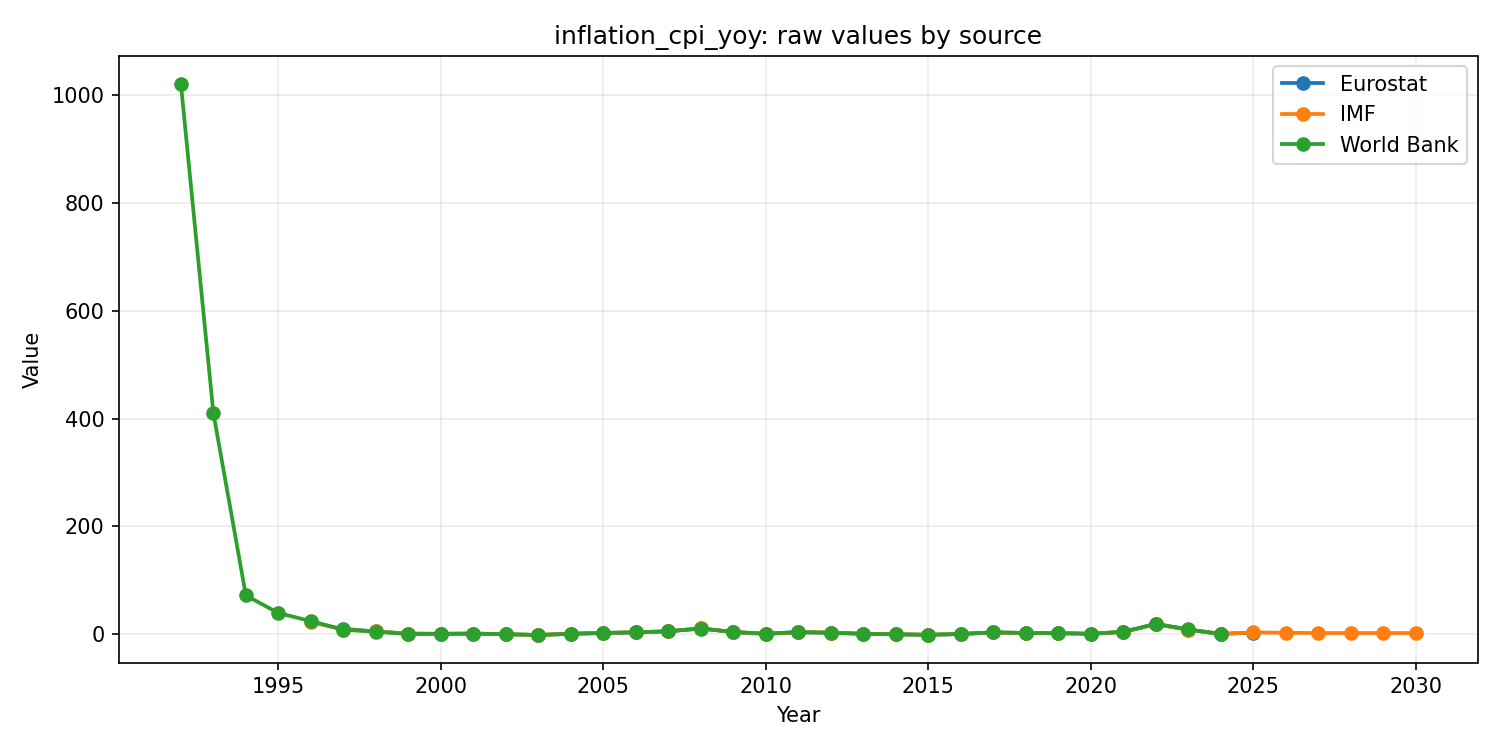

## trade_balance_pct_gdp

,chart_type,status,base_year,file_path,note
9,overlay_index,ok,1995.0,/workspaces/da-ai/bs2026_student_projects/Artu...,
8,raw,ok,NaN,/workspaces/da-ai/bs2026_student_projects/Artu...,


**overlay_index**

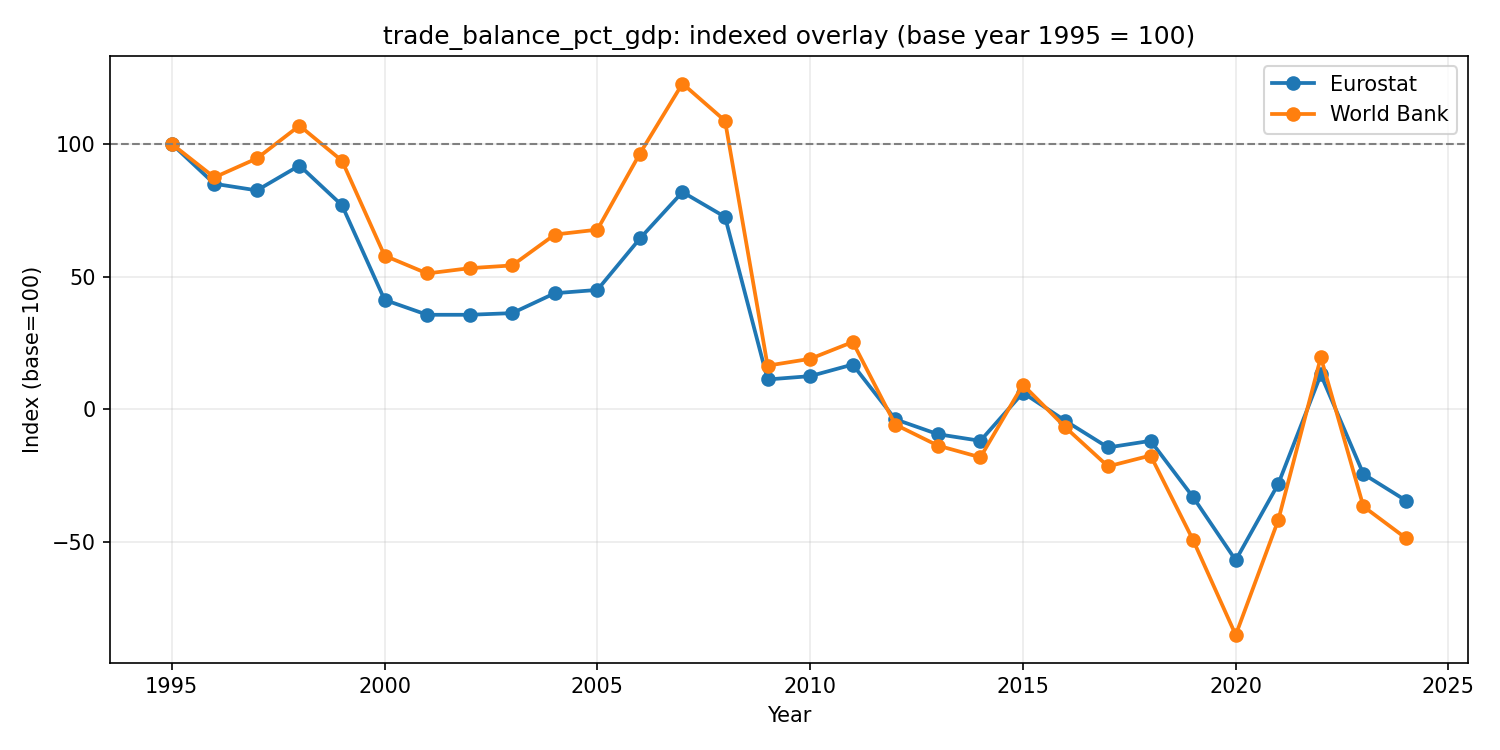

**raw**

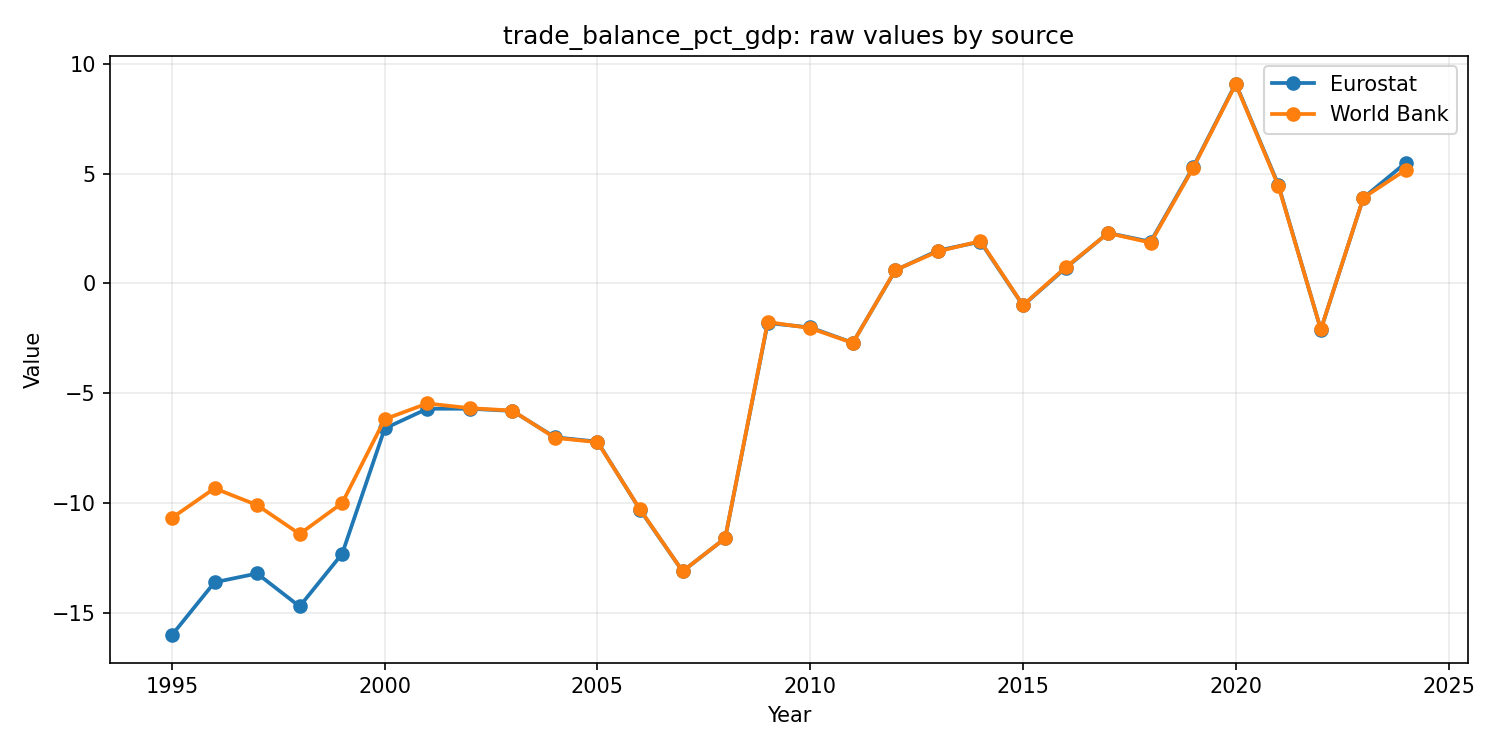

## lending_interest_rate

,chart_type,status,base_year,file_path,note
7,overlay_index,ok,2001.0,/workspaces/da-ai/bs2026_student_projects/Artu...,
6,raw,ok,NaN,/workspaces/da-ai/bs2026_student_projects/Artu...,


**overlay_index**

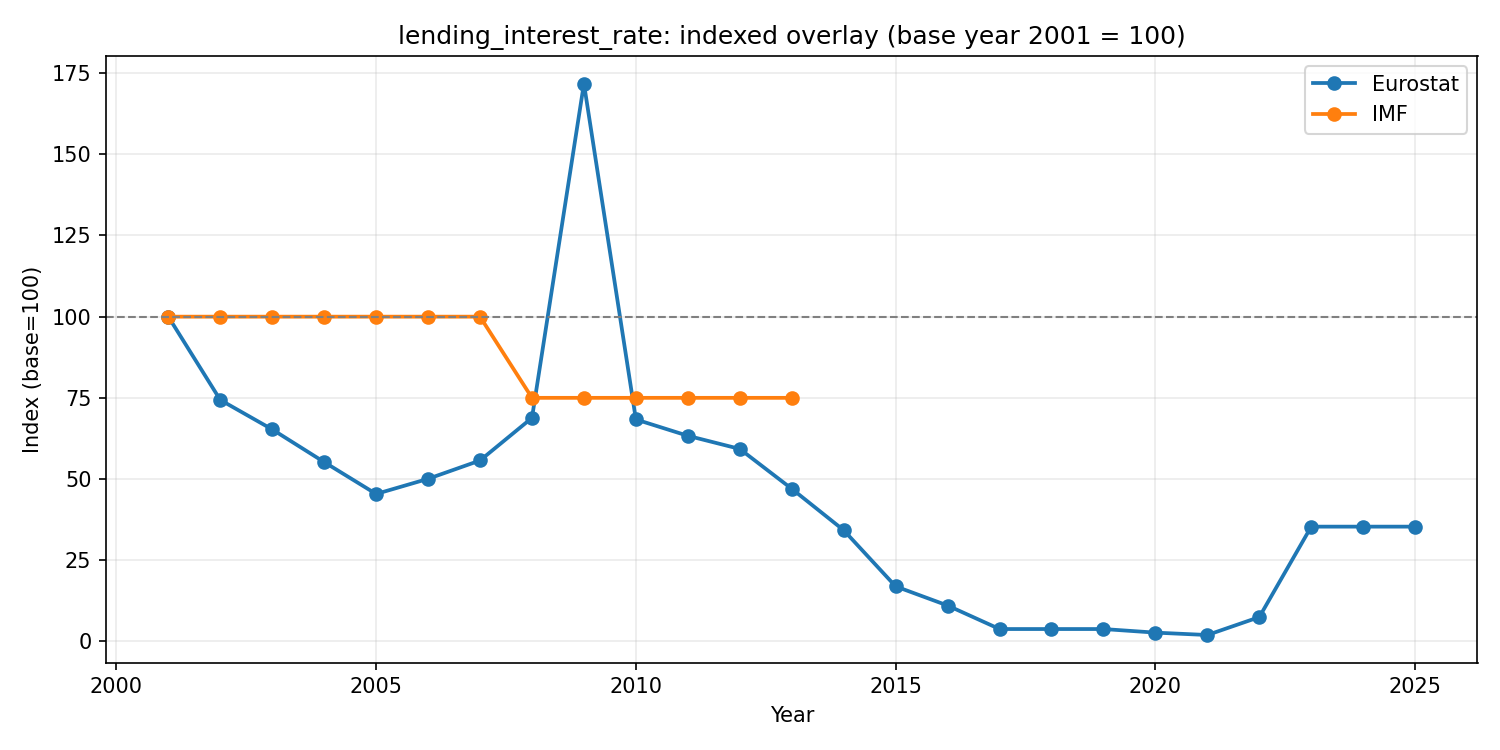

**raw**

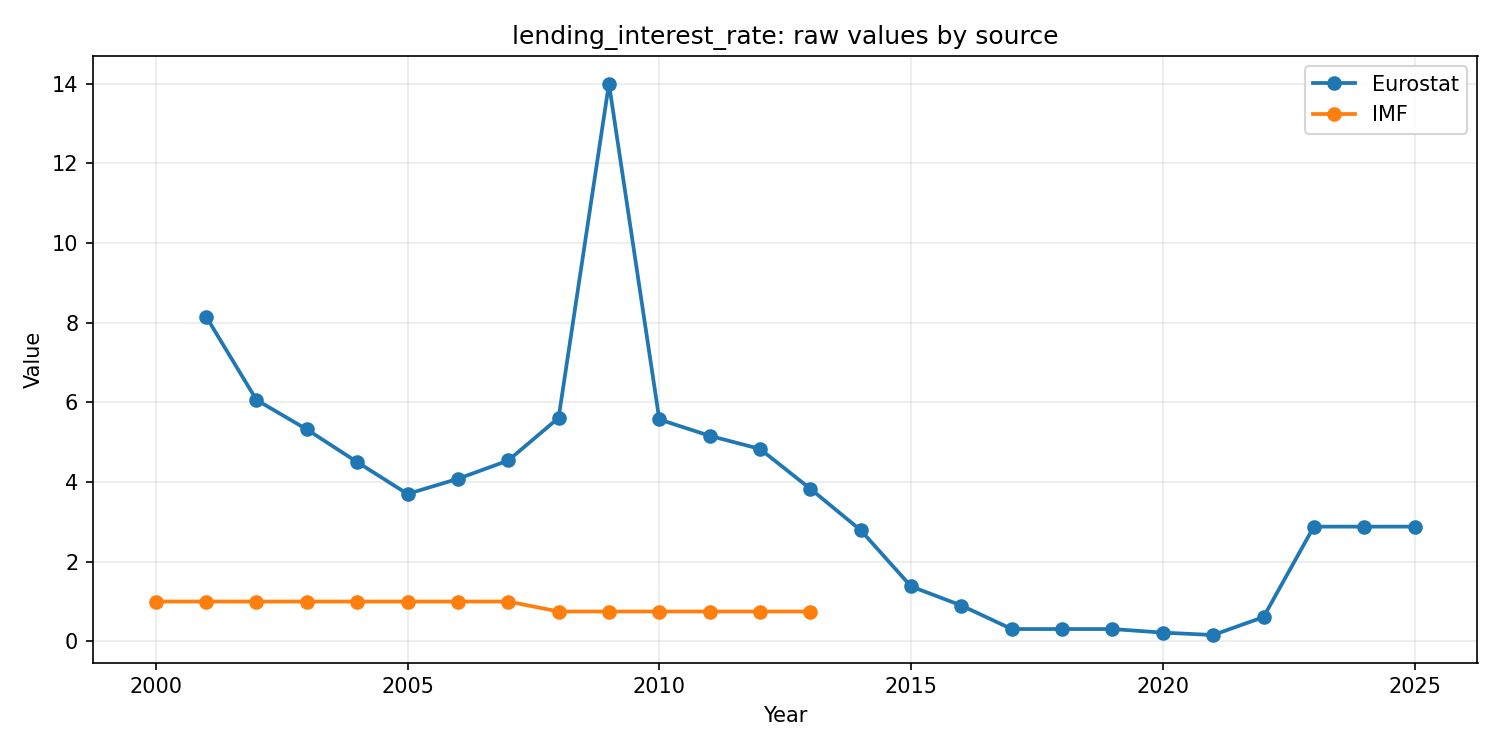

## unemployment_rate

,chart_type,status,base_year,file_path,note
11,overlay_index,ok,1999.0,/workspaces/da-ai/bs2026_student_projects/Artu...,
10,raw,ok,NaN,/workspaces/da-ai/bs2026_student_projects/Artu...,


**overlay_index**

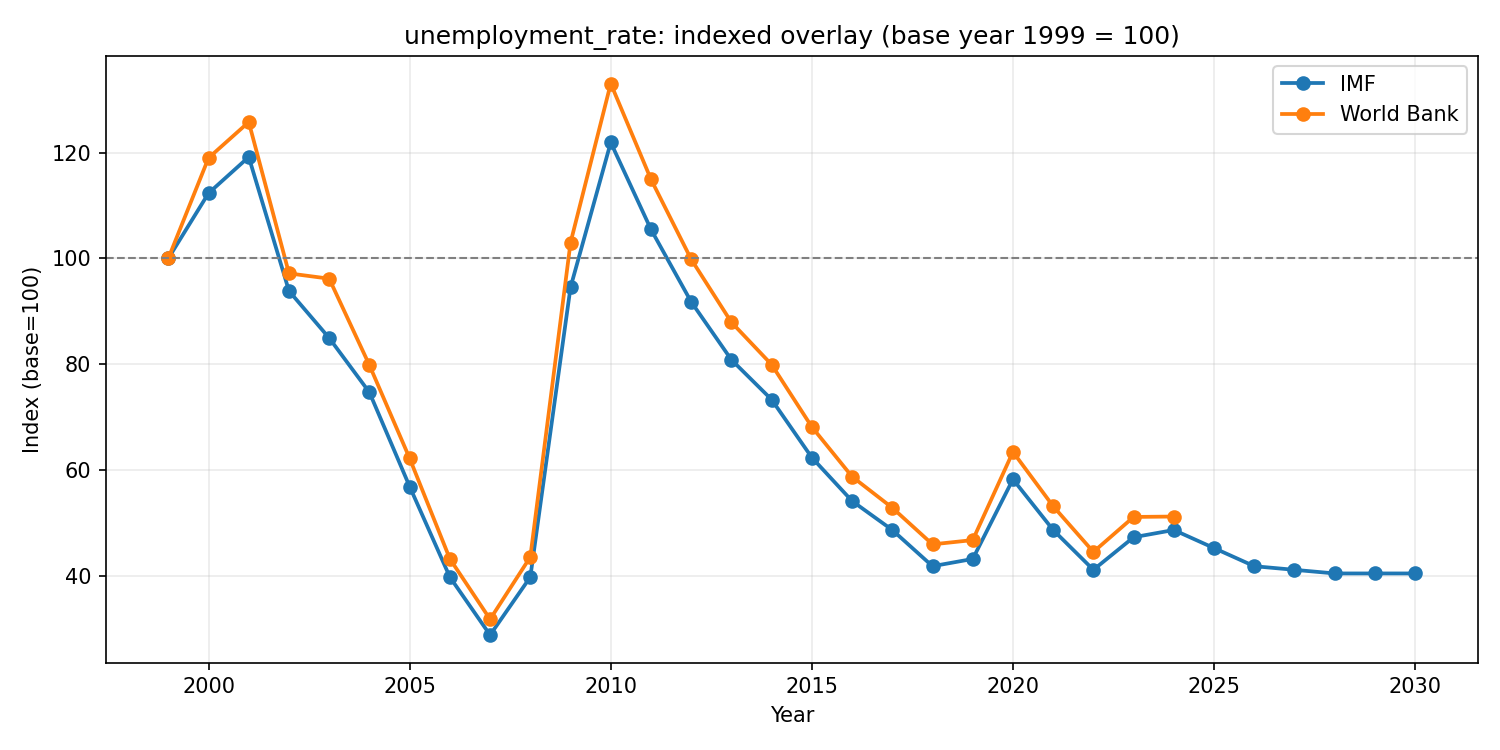

**raw**

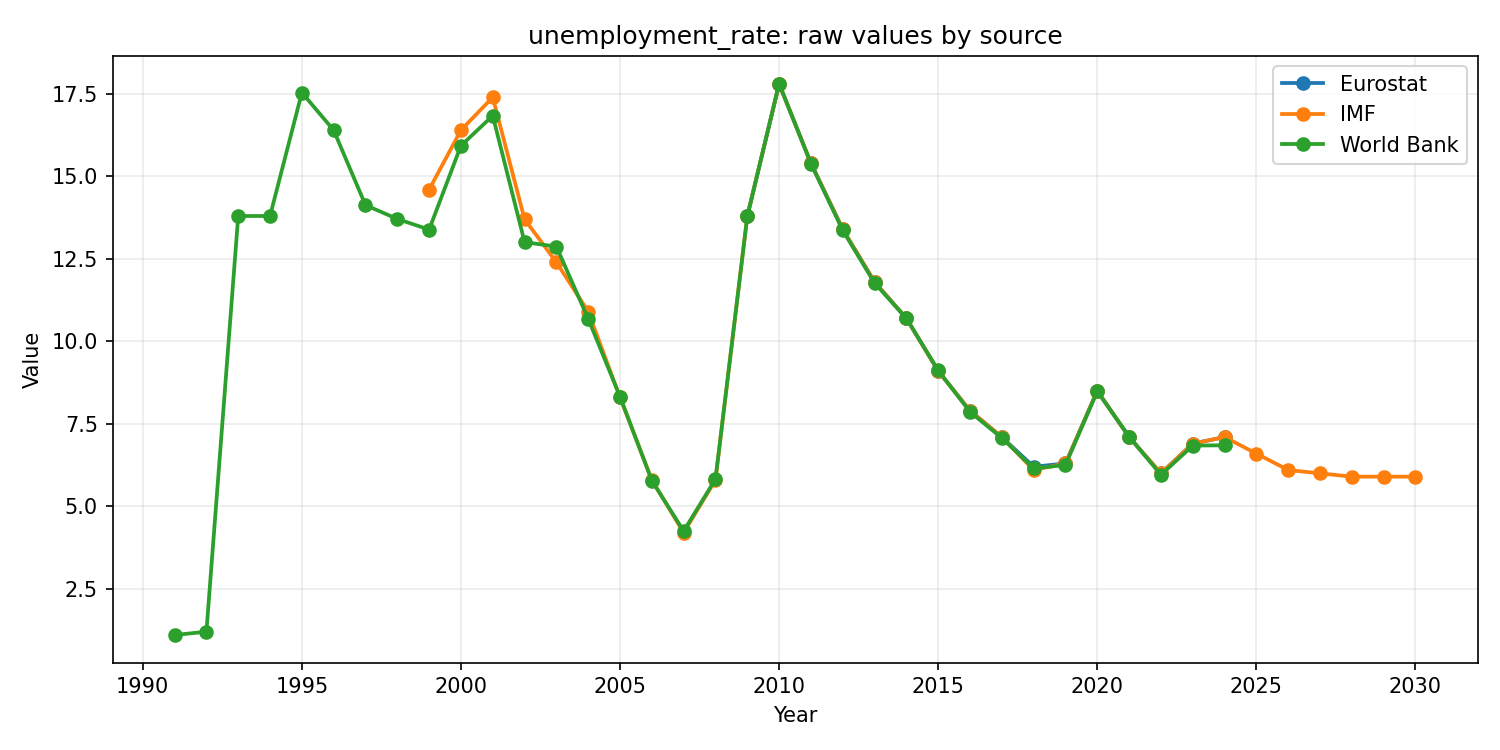

## exchange_rate_lcu_per_usd

,chart_type,status,base_year,file_path,note
1,overlay_index,ok,1992.0,/workspaces/da-ai/bs2026_student_projects/Artu...,
0,raw,ok,NaN,/workspaces/da-ai/bs2026_student_projects/Artu...,


**overlay_index**

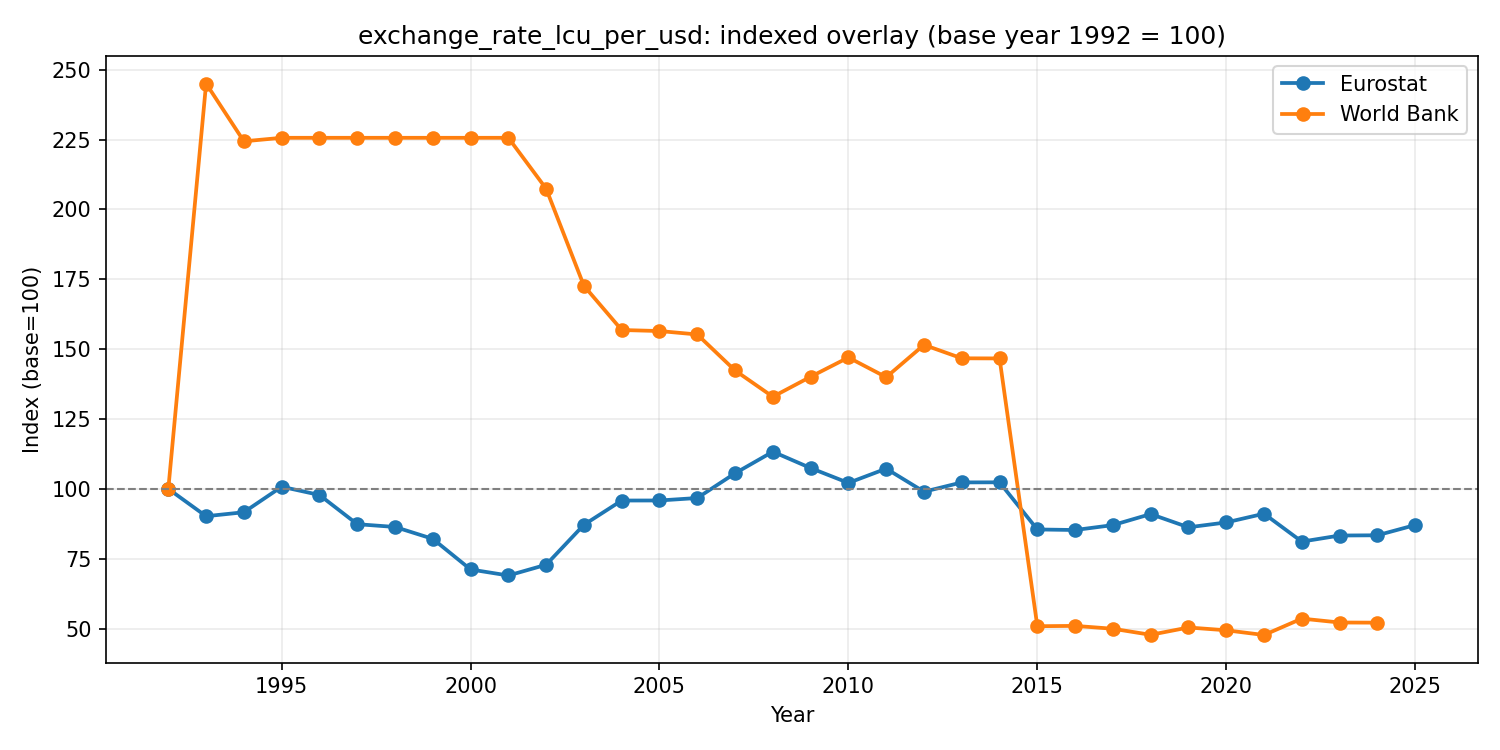

**raw**

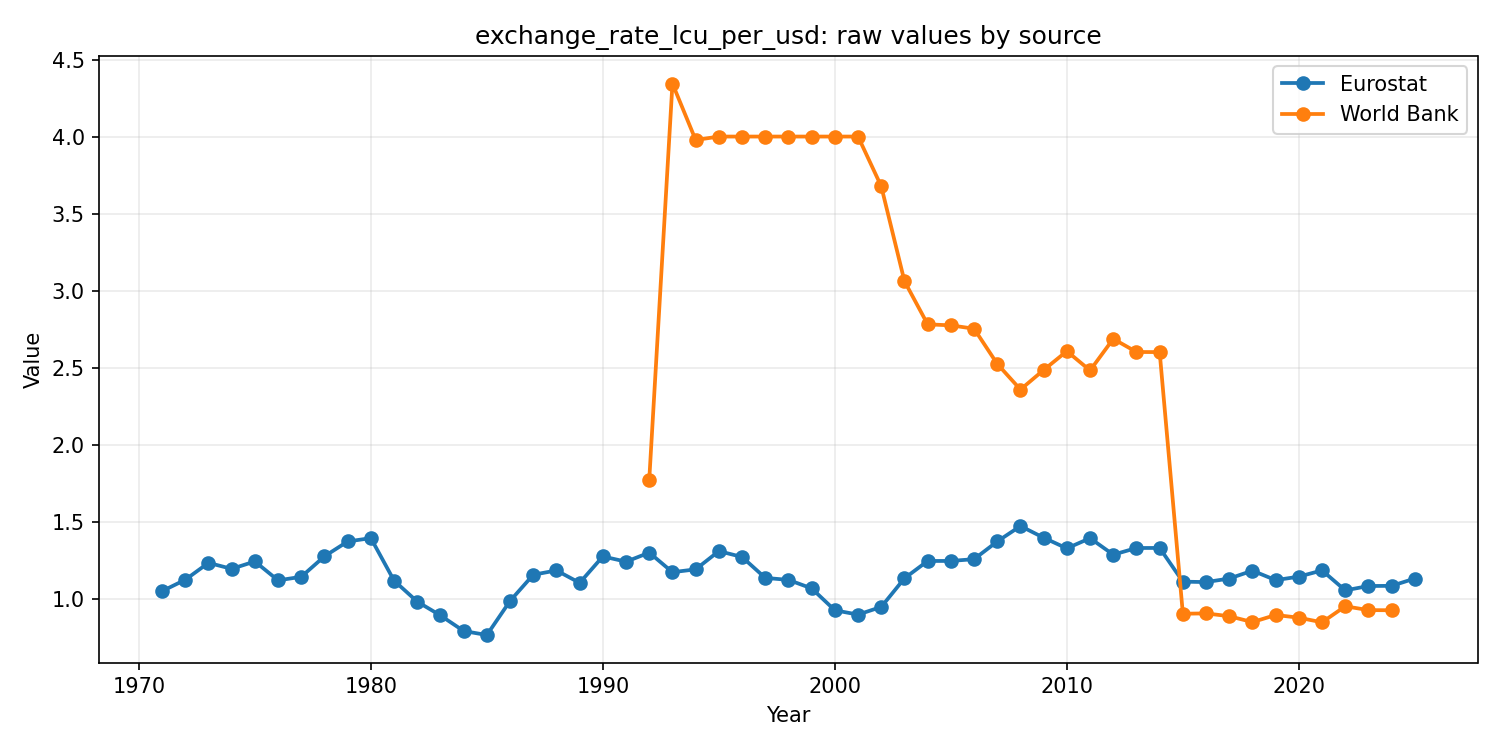

In [5]:
for indicator_id in indicator_index['indicator_id'].tolist():
    display(Markdown(f'## {indicator_id}'))
    manifest_rows = chart_manifest[chart_manifest['indicator_id'] == indicator_id].sort_values('chart_type')
    display(manifest_rows[['chart_type', 'status', 'base_year', 'file_path', 'note']])

    for _, chart_row in manifest_rows.iterrows():
        if chart_row['status'] != 'ok':
            continue
        display(Markdown(f"**{chart_row['chart_type']}**"))
        display(Image(filename=chart_row['file_path']))


## Notes

- `coverage_gaps.csv` documents unresolved exact matches and all proxy mappings.
- `normalized_indicator_long.csv` is the analysis-ready long table used for plotting.
- Charts are saved under `outputs/charts/`.
